In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv("./dataset/glass.data", header = None)
data.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [4]:
data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
data.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
data = data.drop('Id', axis=1)
data.describe().round(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,1.518,13.408,2.685,1.445,72.651,0.497,8.957,0.175,0.057,2.780
std,0.003,0.817,1.442,0.499,0.775,0.652,1.423,0.497,0.097,2.104
min,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000,1.000
25%,1.517,12.908,2.115,1.190,72.280,0.122,8.240,0.000,0.000,1.000
50%,1.518,13.300,3.480,1.360,72.790,0.555,8.600,0.000,0.000,2.000
75%,1.519,13.825,3.600,1.630,73.088,0.610,9.172,0.000,0.100,3.000
max,1.534,17.380,4.490,3.500,75.410,6.210,16.190,3.150,0.510,7.000


array([[<Axes: title={'center': 'Type'}>]], dtype=object)

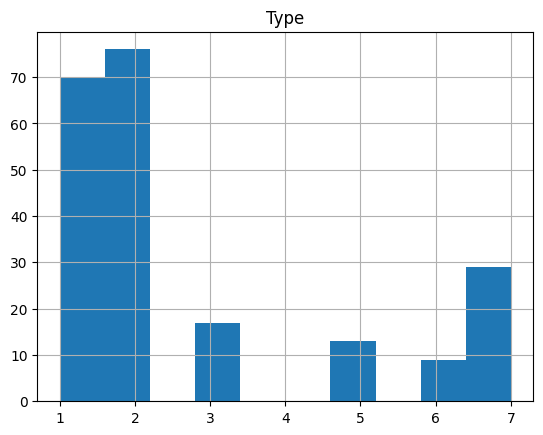

In [7]:
data.hist(column='Type')

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

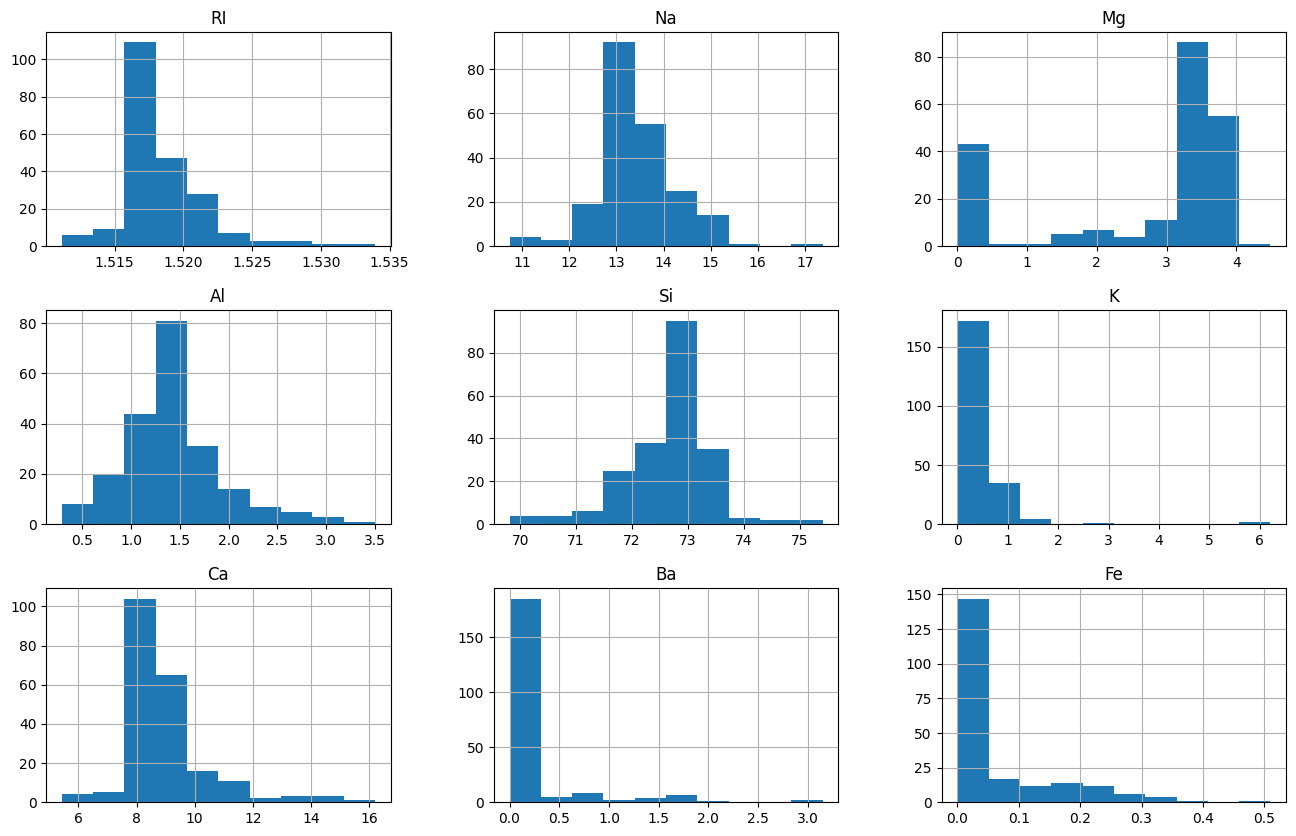

In [8]:
data.hist(column=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], figsize = (16,10))

# Data preparation - split features and labels

In [9]:
X = data.drop('Type', axis = 1)
y = data.Type
print(X.shape, y.shape)

(214, 9) (214,)


# Get evaluation metrics

In [10]:
def evaluate_pred(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

# Test Naive Bayes Classifier without data processing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.46
Precision: 0.41
Recall: 0.50
F1: 0.41


# Test Naive Bayes Classifier with normalized data

In [13]:
X_normalized = MinMaxScaler().fit_transform(X)

In [14]:
print(X_normalized.mean(axis=0))
print(X_normalized.std(axis=0))

[0.31674366 0.40268428 0.59789147 0.35978397 0.50730975 0.08004124
 0.32778463 0.05557039 0.11178303]
[0.13300088 0.12251028 0.3204975  0.15517189 0.13798821 0.10477717
 0.13195395 0.15747815 0.19060936]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

In [16]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.46
Precision: 0.41
Recall: 0.50
F1: 0.41


# Test Naive Bayes Classifier with standardized data

In [17]:
X_standardized = StandardScaler().fit_transform(X)

In [18]:
print(X_standardized.mean(axis=0))
print(X_standardized.std(axis=0))

[-2.87703402e-14  2.19139348e-15 -1.32811726e-16 -2.98826384e-16
  9.52509100e-16  3.52781148e-17 -3.15427850e-16 -6.64058632e-17
 -3.73532980e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=0)

In [20]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.46
Precision: 0.41
Recall: 0.50
F1: 0.41


# Test Naive Bayes Classifier with dimensionality reduction using PCA

In [21]:
pca = PCA(n_components=8)
pca.fit(X_normalized)
X_pca = pca.transform(X_normalized)

pca.explained_variance_

array([0.12234891, 0.04845014, 0.03406697, 0.02638713, 0.01848151,
       0.01134923, 0.00702857, 0.00116559])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.52
Precision: 0.40
Recall: 0.37
F1: 0.35


# Test Decision Tree Classifier with different sets of hyperparameters

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

In [24]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
np.random.seed(0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.65
Precision: 0.61
Recall: 0.74
F1: 0.64


In [26]:
np.random.seed(0)
params = {'criterion': 'entropy', 
         }
clf_1 = DecisionTreeClassifier(**params)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.63
Precision: 0.72
Recall: 0.69
F1: 0.68


In [107]:
np.random.seed(0)
params = {'criterion': 'entropy', 
          'max_depth': 5
         }
clf_2 = DecisionTreeClassifier(**params)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.68
Precision: 0.76
Recall: 0.71
F1: 0.71


In [108]:
np.random.seed(0)
params = {'criterion': 'gini', 
          'max_depth': 5, 
          'max_features': 'sqrt'
         }
clf_3 = DecisionTreeClassifier(**params)
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.71
Precision: 0.76
Recall: 0.79
F1: 0.75


In [109]:
np.random.seed(0)
params = {'criterion': 'gini', 
          'max_depth': 10, 
          'max_features': 'sqrt'
         }
clf_4 = DecisionTreeClassifier(**params)
clf_4.fit(X_train, y_train)
y_pred = clf_4.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.74
Precision: 0.75
Recall: 0.81
F1: 0.78


# Test GaussianNB Classifier with different sets of hyperparameters

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

In [112]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [113]:
params = {'priors': None, 'var_smoothing': 1e-9}
clf = GaussianNB(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.46
Precision: 0.41
Recall: 0.50
F1: 0.41


In [114]:
params = {'priors': None, 'var_smoothing': 1e-2}
clf = GaussianNB(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.48
Precision: 0.46
Recall: 0.50
F1: 0.45


In [115]:
probabilities = data.groupby('Type').size().div(len(data))
probabilities = probabilities.sample(frac=1)
probabilities

Type
6    0.042056
3    0.079439
2    0.355140
5    0.060748
1    0.327103
7    0.135514
dtype: float64

In [116]:
params = {'priors': probabilities, 'var_smoothing': 1e-2}
clf = GaussianNB(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.28
Precision: 0.41
Recall: 0.50
F1: 0.32


# Test Decision Tree Classifier with different types of data preparation

In [117]:
params = {'criterion': 'gini', 
          'max_depth': 10, 
          'max_features': 'sqrt'
         }

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
np.random.seed(0)
clf = DecisionTreeClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.72
Precision: 0.75
Recall: 0.80
F1: 0.77


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)
np.random.seed(0)
clf = DecisionTreeClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.74
Precision: 0.75
Recall: 0.81
F1: 0.78


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=0)
np.random.seed(0)
clf = DecisionTreeClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluate_pred(y_test, y_pred)

Accuracy: 0.74
Precision: 0.75
Recall: 0.81
F1: 0.78
